In [1]:
import torch
import torch.nn as nn
from vae_models import VAE_CONV_NeuralModel
from mnist_classifier import NeuralModel, test_model
from utils import data_loader
import torch.nn.functional as F
import time 
import numpy as np 
import matplotlib.pyplot as plt 
import sys
from multiple_attacks import *

In [2]:
train_set, test_set = data_loader.get_data()

batch_size =128

test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)
use_cuda = True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")
BOLD    = "\033[;1m"
RED   = "\033[1;31m"
RESET = "\033[0;0m"

In [3]:
epsilons = .3
accuracies = []


In [4]:
class VAEClassifierModel(nn.Module):
    def __init__(self, beta):
        super().__init__()
        self.vae = VAE_CONV_NeuralModel()
        self.vae.load_state_dict(torch.load("models/trained_CONV_vae_B="+str(beta)))

        self.classification_model = NeuralModel()
        self.classification_model.load_state_dict(torch.load("models/trained_model"))

    def forward(self, x):
        after_vae = self.vae(x)
        classification = self.classification_model(after_vae[0])

        return classification
        pass

In [5]:

fgsms = []
pgds = []
ifgsms=[]
deepfools=[]
eps = 0.3
for b in range(1,9):
    model = VAEClassifierModel(beta =b)
    
    fgsms.append(attack(model, device, test_loader, fgsm, eps)[0])

    pgds.append(attack(model, device, test_loader, pgd, eps, 1e4, 50)[0])

    ifgsms.append(attack(model, device, test_loader, pgd_linf, eps, 1e-2, 50)[0])

    deepfools.append(attack(model, device, test_loader, pgd_l2, 1.3, eps, 50)[0])
    


FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 
FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 
FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 
FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 
FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 
FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 
FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 
FGSM Attack : 
Projected Gradient Attack : 
iFGSM Attack : 
Deep Fool Attack : 


In [6]:
batch_size =128
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)
clean_accuracies = []
for b in range(1,9):
        model = VAEClassifierModel(beta =b)
        acc = test_model(model, test_loader)
        clean_accuracies.append(acc)
print(clean_accuracies)

[0.9529, 0.9589, 0.956, 0.9475, 0.939, 0.9187, 0.8999, 0.8845]


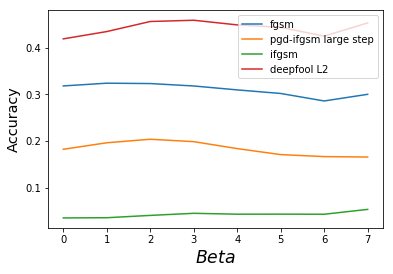

In [8]:
plt.plot(fgsms, label = 'fgsm')
plt.plot(pgds, label ="pgd-ifgsm large step")
plt.plot(ifgsms, label = 'ifgsm')
plt.plot(deepfools, label = 'deepfool L2')
plt.legend() 

plt.xlabel('$Beta$', size = 'xx-large', fontweight = 'demi')
plt.ylabel('Accuracy', size = 'x-large')
plt.savefig('figures/vae_classifier.pdf', format='pdf', bbox_inches='tight', quality = 100)

plt.show()